<a href="https://colab.research.google.com/github/carloscotrini/transformers_from_scratch/blob/main/AML_MyTransfomerV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import random

SHAPES = ["triangle", "circle"]
PLURALS = [shape + "s" for shape in SHAPES]
ARTICLES = ["a", "one"]
TWO_ARTICLES = ["two"]
CONNECTORS = ["and", "then"]
REVERSE_CONNECTORS = ["after"]
CLASS_TOKEN = "CLS"
MASK_TOKEN = "MASK"
SEP_TOKEN = "SEP"
PAD_TOKEN = "PAD"
EOS_TOKEN = "EOS"
SPECIAL_TOKENS = [CLASS_TOKEN, MASK_TOKEN, SEP_TOKEN, PAD_TOKEN, EOS_TOKEN]
VOCABULARY = SHAPES + PLURALS + ARTICLES + CONNECTORS + REVERSE_CONNECTORS + TWO_ARTICLES + SPECIAL_TOKENS
MAX_LEN_SENTENCE = 16 # Maximum possible length of a sequence

def generate_descr_from_list(r):
  if len(r) > 4:
    raise Exception("Too many items")
  elif len(r) == 0:
    return ""
  elif len(r) == 1:
    article = random.choice(ARTICLES)
    return "{} {}".format(article, r[0])
  else:
    reversed_descr = random.random() > 0.5
    if reversed_descr:
      descr = "{} {} {}".format(r[1], random.choice(REVERSE_CONNECTORS), r[0])
      if len(r) > 2:
        return descr + " " + random.choice(CONNECTORS) + " " + generate_descr_from_list(r[2:])
      return descr
    if r[0] == r[1]:
      plural_desc = random.random() > 0.5
      if plural_desc:
          return "{} {}s".format(random.choice(TWO_ARTICLES), r[0])
    return generate_descr_from_list([r[0]]) + " " + random.choice(CONNECTORS) + " " + generate_descr_from_list(r[1:])


def generate_random_shapes():
  num_shapes = random.randint(1, 4)
  result = []
  for _ in range(num_shapes):
    result.append(random.choice(SHAPES))
  return result


for i in range(100):
  print(generate_descr_from_list(generate_random_shapes()))



one triangle
triangle after circle
one triangle then two triangles
circle after circle then one triangle
a triangle
a circle
circle after circle
one circle and circle after triangle then one circle
one circle then one triangle and one circle
triangle after triangle and one circle then one circle
a triangle
triangle after circle
circle after triangle
circle after circle then circle after circle
two triangles
triangle after circle and one circle
circle after circle and circle after circle
a triangle then circle after circle then a circle
a triangle and one circle then triangle after triangle
one circle
one circle and triangle after triangle
one triangle
a circle then one triangle
triangle after circle and a triangle
a circle
two triangles
triangle after triangle then one circle
one circle then circle after triangle and one circle
triangle after triangle and one circle
circle after triangle
one triangle
circle after triangle then one triangle then a triangle
circle after circle and a circ

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import random

def generate_image(word_list, filename):
    # Create a blank 32x32 image
    image_size = 32
    patch_size = 16
    image = Image.new("1", (image_size, image_size), 1)  # '1' for 1-bit pixels, black and white

    for i, word in enumerate(word_list):
        if word not in ["triangle", "circle"]:
            continue

        # Determine the top-left corner of the patch
        x_offset = (i % 2) * patch_size
        y_offset = (i // 2) * patch_size

        # Draw the shape in the corresponding patch
        draw = ImageDraw.Draw(image)
        if word == "triangle":
            points = [(random.randint(x_offset, x_offset + patch_size), random.randint(y_offset, y_offset + patch_size)) for _ in range(3)]
            draw.polygon(points, fill=0)
        elif word == "circle":
            radius = random.randint(2, patch_size // 2)
            center_x = random.randint(x_offset + radius, x_offset + patch_size - radius)
            center_y = random.randint(y_offset + radius, y_offset + patch_size - radius)
            draw.ellipse([center_x - radius, center_y - radius, center_x + radius, center_y + radius], fill=0)

    # Save the image to the specified filename
    image.save(filename)

def plot_image(filename):
    # Open the image
    image = Image.open(filename)

    # Convert the image to a NumPy array
    image_array = np.array(image)

    # Plot the image
    plt.imshow(image_array)
    plt.axis('off')  # Turn off axis labels
    plt.show()

# Example usage:
generate_image(["circle", "triangle", "circle"], "output_image.png")


In [82]:
NUMBER_CODES = [str(i) for i in range(5)]
SHAPE_CODES = [shape[0] for shape in SHAPES]
CODES = NUMBER_CODES + SHAPE_CODES
CODE_VOCABULARY = SPECIAL_TOKENS + CODES

def generate_code_str(shape_list):
  codes = []
  i = 0
  while i < len(shape_list):
    j = i + 1
    while j < len(shape_list) and shape_list[i] == shape_list[j]:
      j += 1
    codes.append(f"{NUMBER_CODES[j-i]} {shape_list[i][0]}")
    i = j
  return " ".join(codes)

['triangle', 'triangle', 'circle', 'circle']
one triangle then one triangle then two circles
2 t 2 c


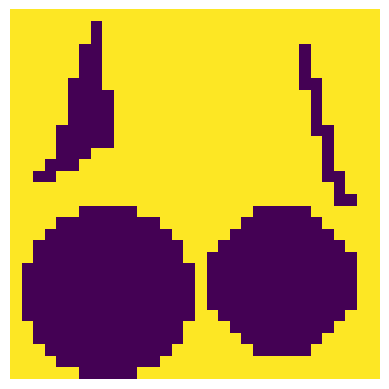

['circle', 'triangle', 'triangle']
triangle after circle and one triangle
1 c 2 t


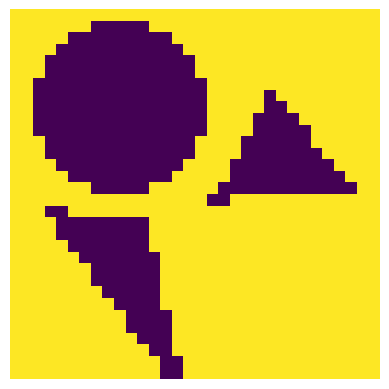

['circle', 'circle', 'circle']
circle after circle and a circle
3 c


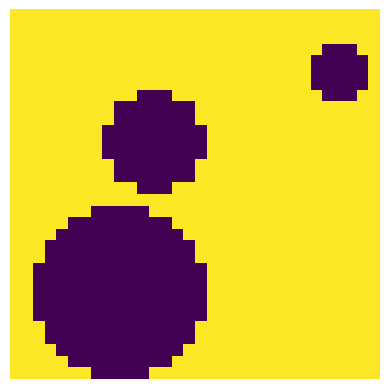

['triangle', 'triangle']
two triangles
2 t


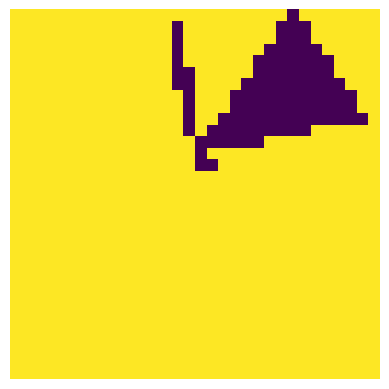

['circle', 'circle']
circle after circle
2 c


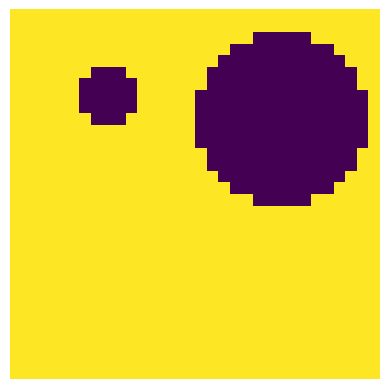

['circle']
a circle
1 c


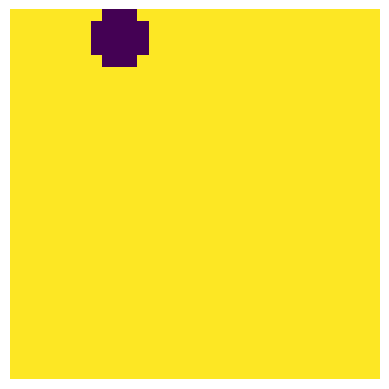

['circle', 'triangle', 'circle']
a circle and circle after triangle
1 c 1 t 1 c


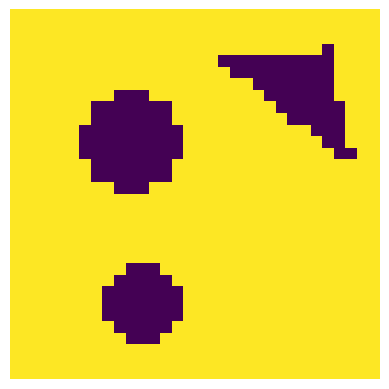

['triangle', 'triangle', 'triangle', 'triangle']
triangle after triangle and triangle after triangle
4 t


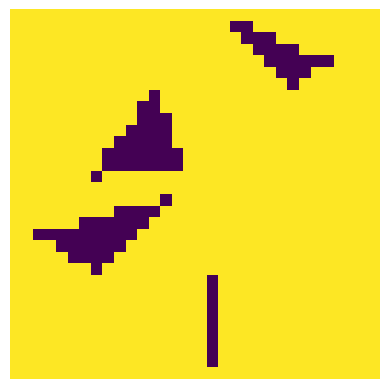

['triangle', 'circle', 'triangle', 'circle']
a triangle and one circle and circle after triangle
1 t 1 c 1 t 1 c


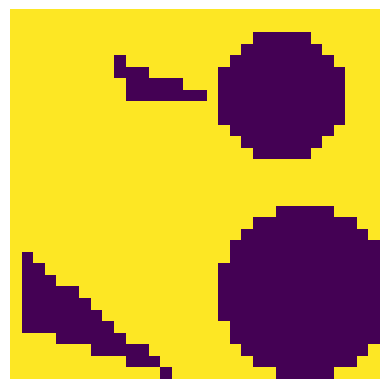

['triangle', 'circle', 'circle']
circle after triangle then one circle
1 t 2 c


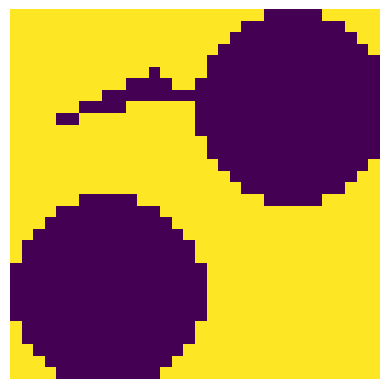

['triangle', 'circle']
circle after triangle
1 t 1 c


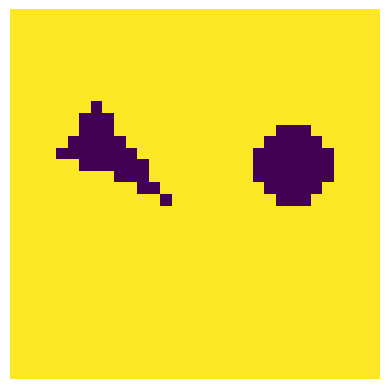

['triangle', 'triangle']
one triangle and a triangle
2 t


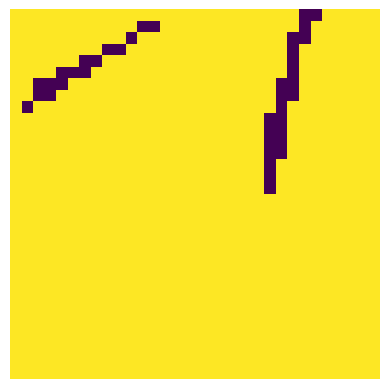

['triangle', 'circle']
a triangle and one circle
1 t 1 c


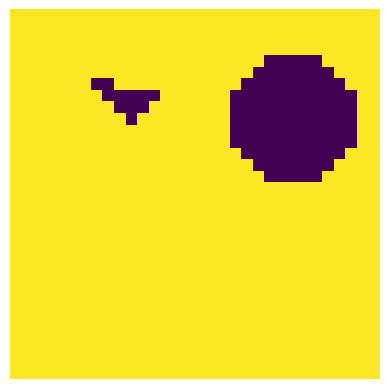

['circle']
one circle
1 c


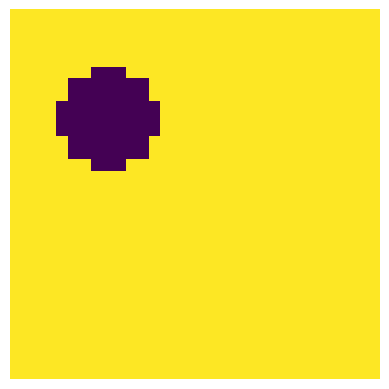

['circle', 'triangle', 'triangle']
triangle after circle then a triangle
1 c 2 t


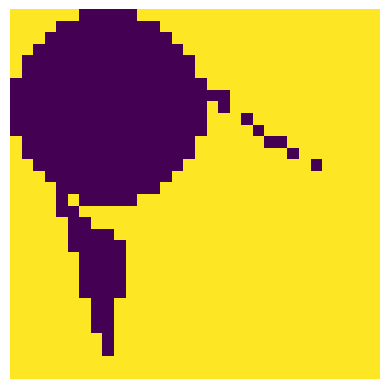

['circle']
a circle
1 c


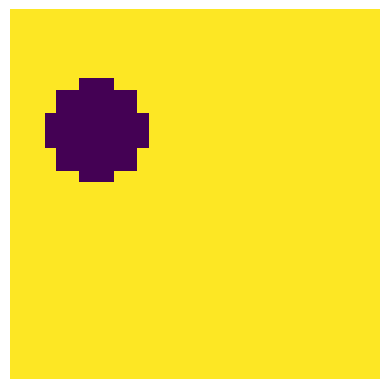

['circle', 'circle', 'circle', 'triangle']
circle after circle then triangle after circle
3 c 1 t


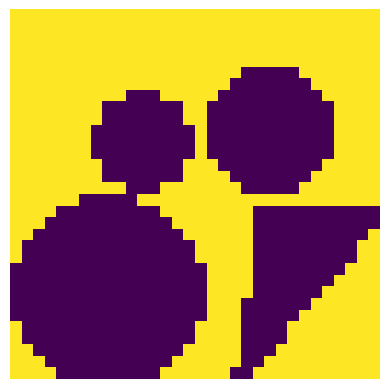

['circle', 'triangle']
triangle after circle
1 c 1 t


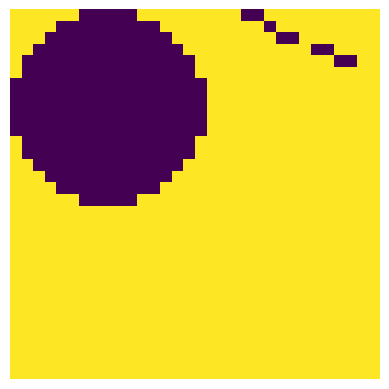

['circle', 'circle', 'triangle', 'triangle']
a circle then triangle after circle and one triangle
2 c 2 t


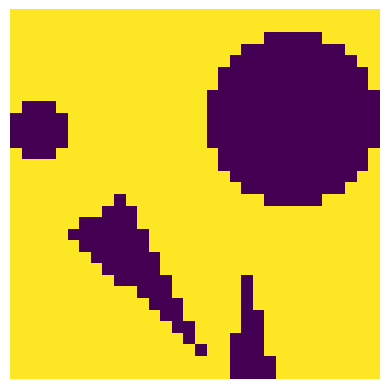

['circle', 'triangle']
one circle then one triangle
1 c 1 t


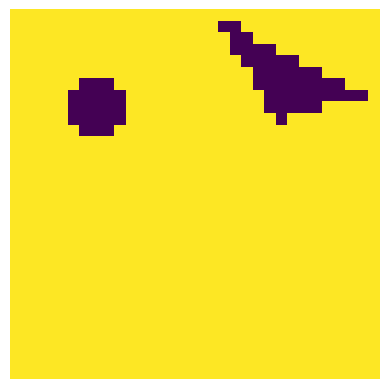

['triangle']
a triangle
1 t


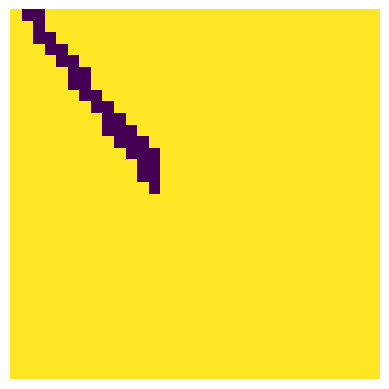

['triangle', 'triangle', 'circle']
triangle after triangle then one circle
2 t 1 c


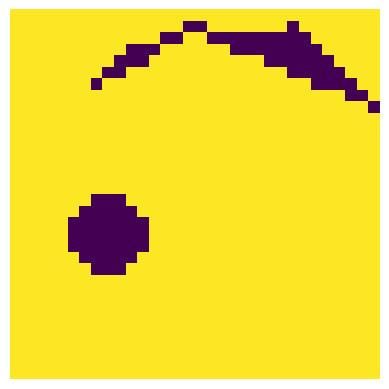

['circle', 'circle']
circle after circle
2 c


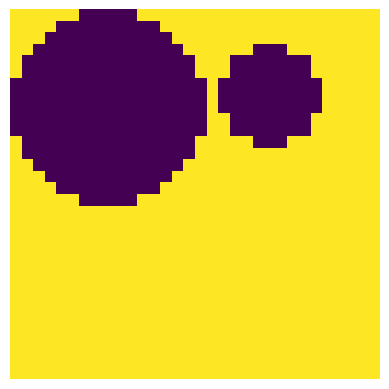

['circle']
one circle
1 c


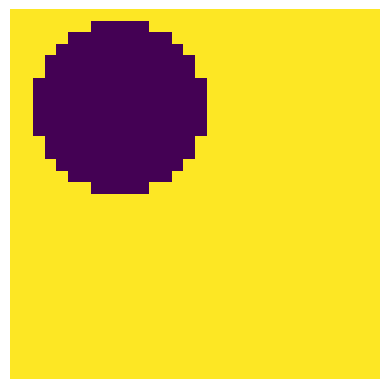

['circle', 'triangle']
a circle and one triangle
1 c 1 t


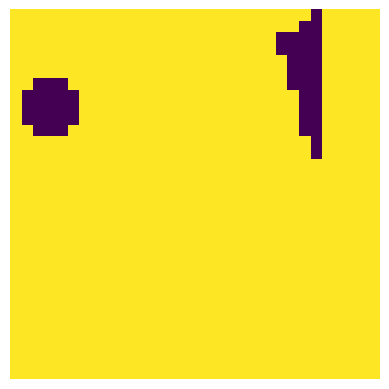

['triangle', 'triangle', 'triangle']
triangle after triangle then a triangle
3 t


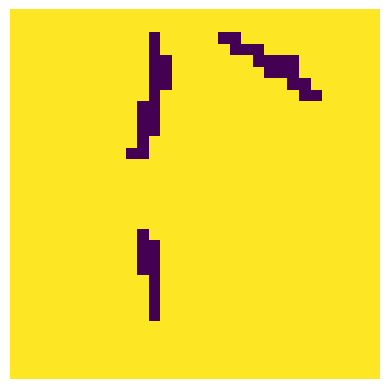

['circle', 'triangle']
one circle then one triangle
1 c 1 t


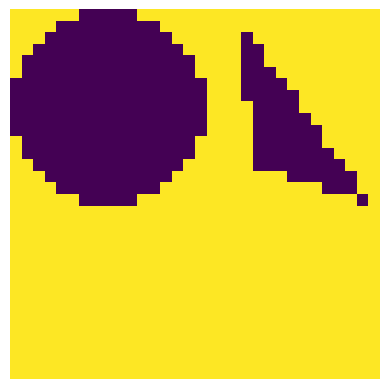

['triangle']
one triangle
1 t


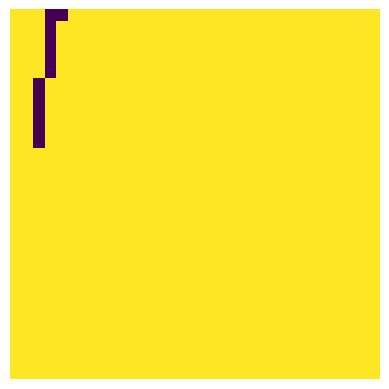

['circle']
one circle
1 c


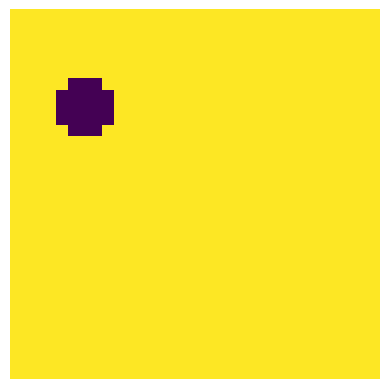

['circle', 'triangle']
a circle and a triangle
1 c 1 t


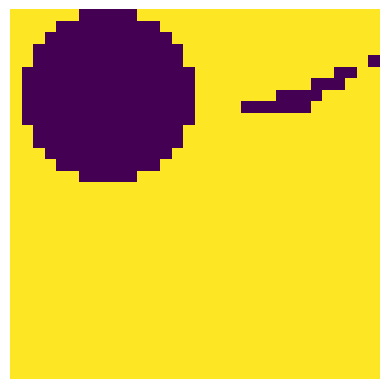

['circle', 'circle', 'circle', 'triangle']
one circle then one circle and triangle after circle
3 c 1 t


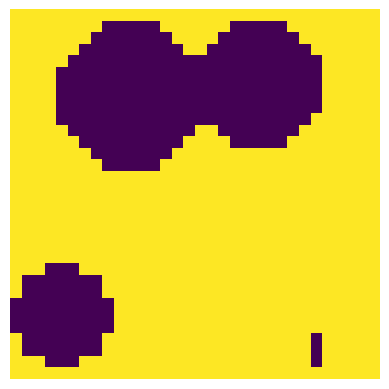

['circle', 'circle', 'triangle', 'triangle']
circle after circle then two triangles
2 c 2 t


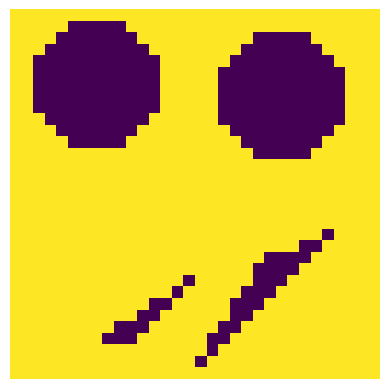

['circle', 'circle']
circle after circle
2 c


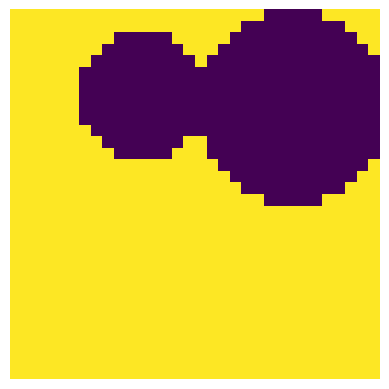

['circle', 'triangle', 'circle', 'triangle']
triangle after circle then a circle then one triangle
1 c 1 t 1 c 1 t


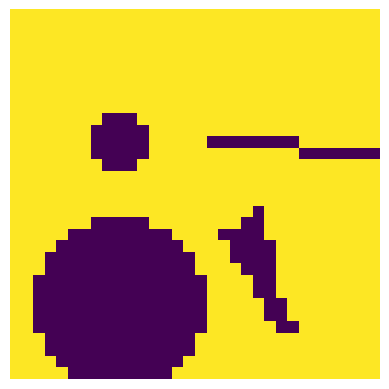

['circle', 'circle', 'circle']
circle after circle then one circle
3 c


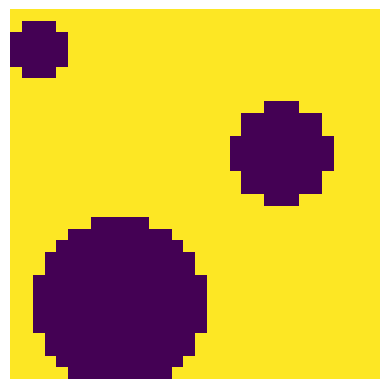

['circle', 'triangle']
triangle after circle
1 c 1 t


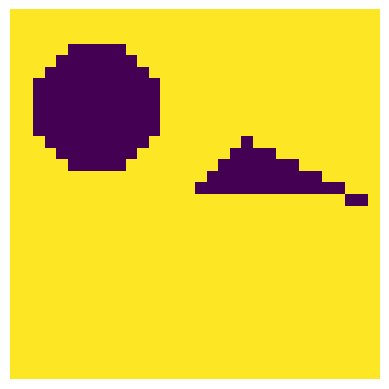

['triangle', 'circle', 'triangle']
one triangle and a circle then one triangle
1 t 1 c 1 t


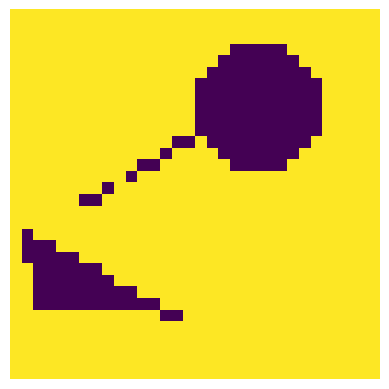

['circle', 'triangle', 'triangle']
one circle and triangle after triangle
1 c 2 t


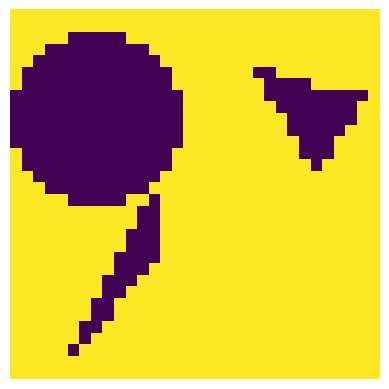

['triangle']
a triangle
1 t


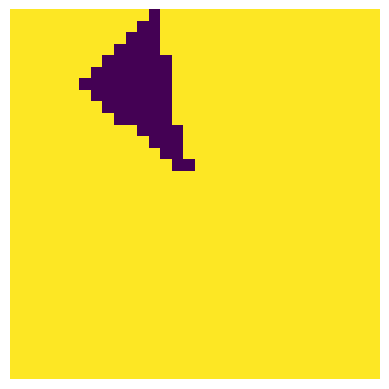

['circle', 'circle', 'triangle']
two circles
2 c 1 t


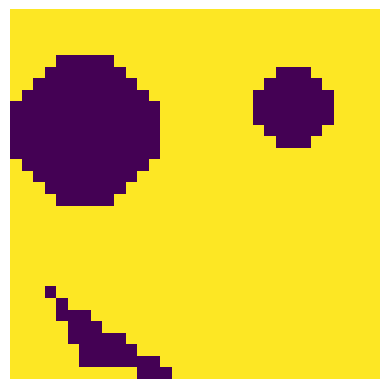

['circle', 'circle']
circle after circle
2 c


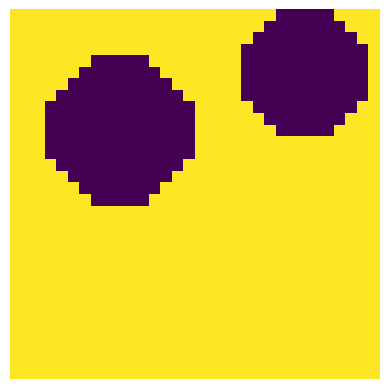

['triangle', 'circle']
one triangle and one circle
1 t 1 c


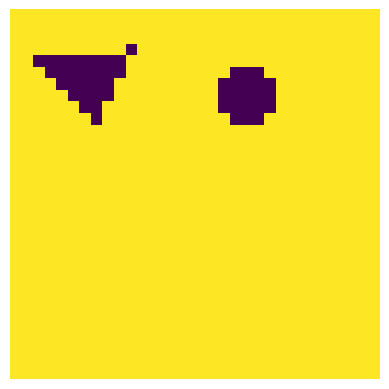

['circle', 'circle', 'circle', 'triangle']
circle after circle then triangle after circle
3 c 1 t


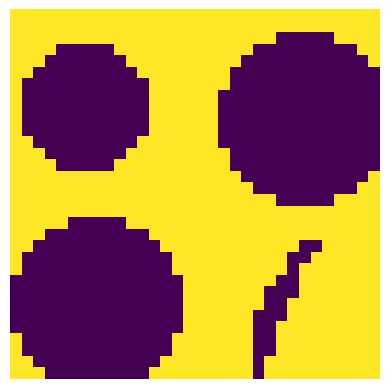

['circle']
one circle
1 c


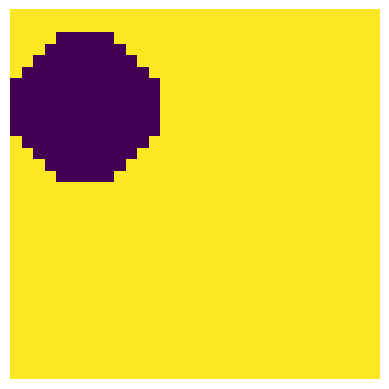

['triangle', 'triangle', 'circle', 'triangle']
triangle after triangle and one circle then one triangle
2 t 1 c 1 t


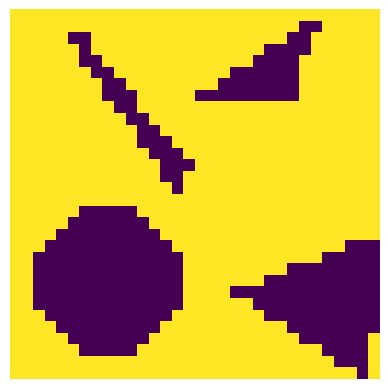

['circle']
one circle
1 c


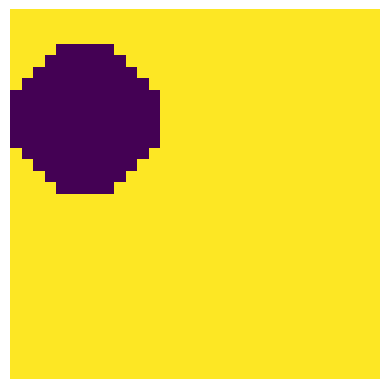

['circle', 'circle', 'triangle', 'triangle']
circle after circle and triangle after triangle
2 c 2 t


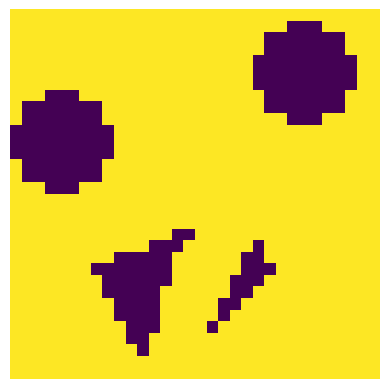

['triangle', 'circle', 'circle', 'circle']
circle after triangle then circle after circle
1 t 3 c


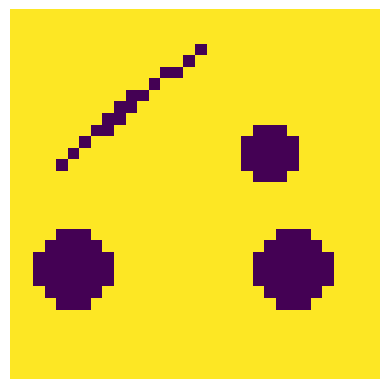

['triangle', 'circle', 'triangle']
circle after triangle then a triangle
1 t 1 c 1 t


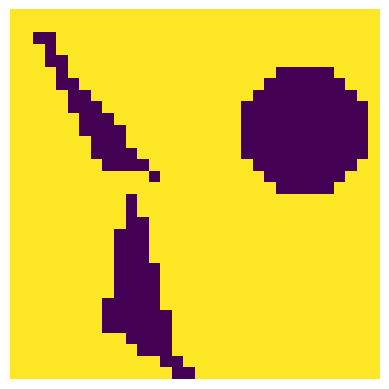

['circle', 'circle']
circle after circle
2 c


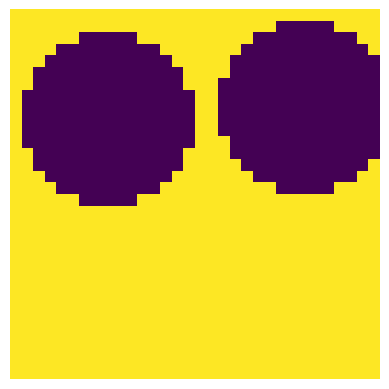

['circle']
a circle
1 c


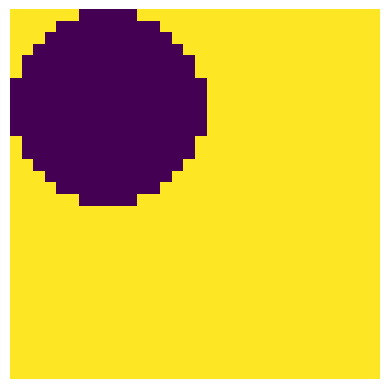

['circle', 'triangle', 'triangle', 'triangle']
triangle after circle then two triangles
1 c 3 t


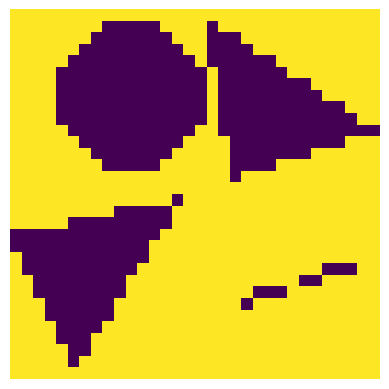

['circle', 'circle', 'circle', 'triangle']
a circle then circle after circle and one triangle
3 c 1 t


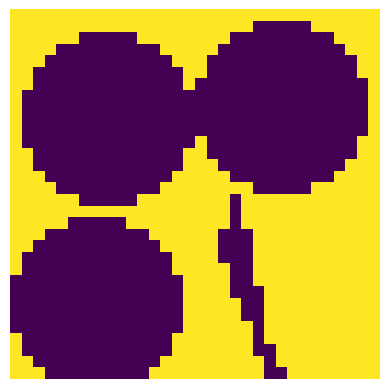

['circle', 'triangle']
triangle after circle
1 c 1 t


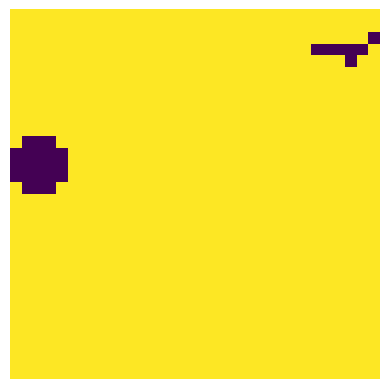

['triangle']
a triangle
1 t


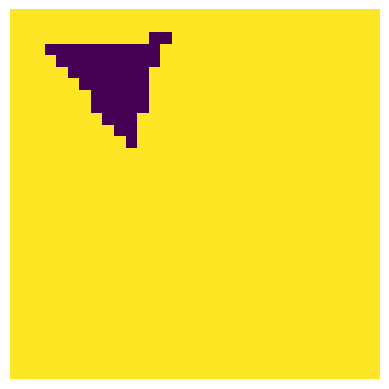

['circle', 'circle']
circle after circle
2 c


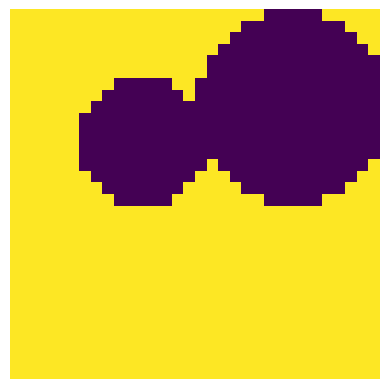

['triangle', 'triangle', 'circle', 'circle']
two triangles
2 t 2 c


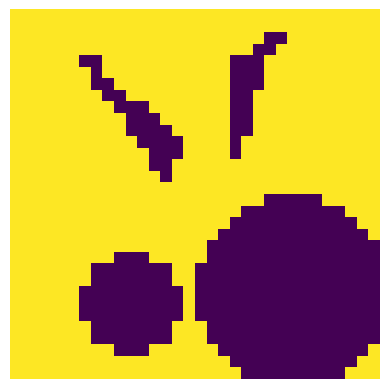

['circle', 'circle']
one circle and one circle
2 c


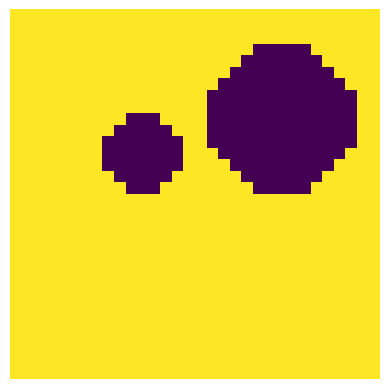

['circle', 'circle', 'circle']
a circle then a circle and one circle
3 c


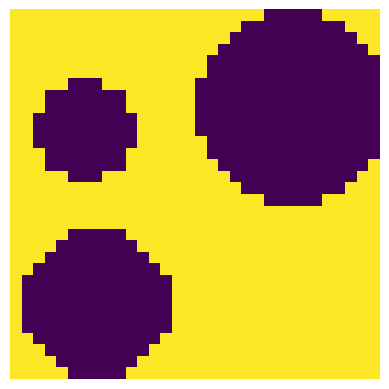

['circle']
a circle
1 c


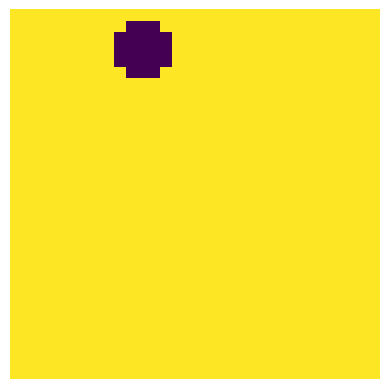

['triangle', 'circle', 'circle']
a triangle and circle after circle
1 t 2 c


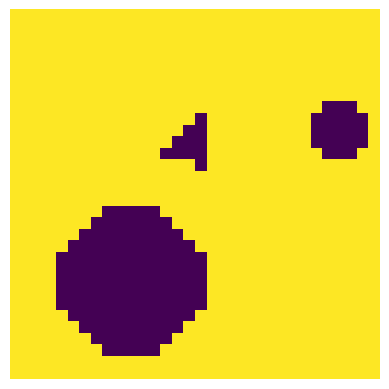

['circle']
one circle
1 c


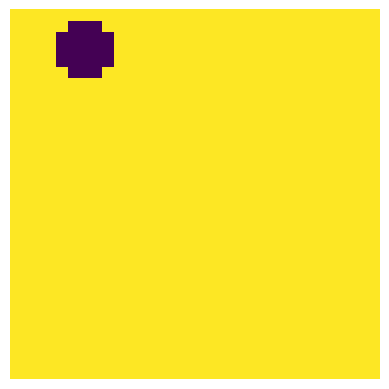

['triangle', 'triangle', 'circle']
triangle after triangle and one circle
2 t 1 c


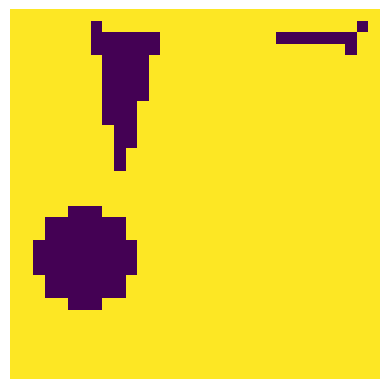

['circle', 'triangle']
a circle and a triangle
1 c 1 t


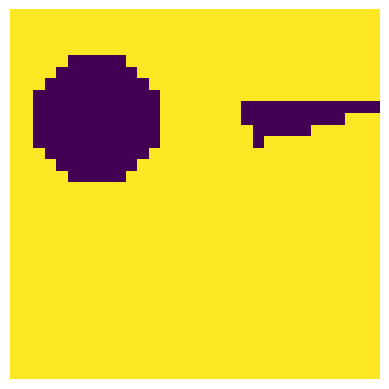

['triangle', 'triangle']
triangle after triangle
2 t


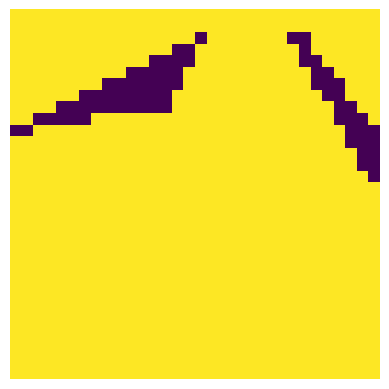

['triangle', 'circle']
a triangle then a circle
1 t 1 c


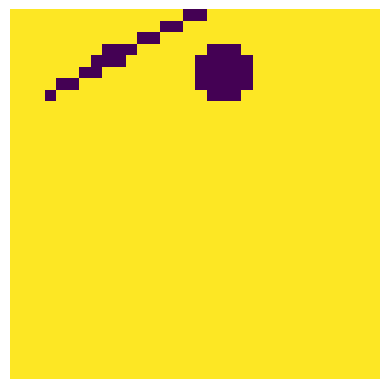

['circle', 'triangle', 'circle']
one circle then circle after triangle
1 c 1 t 1 c


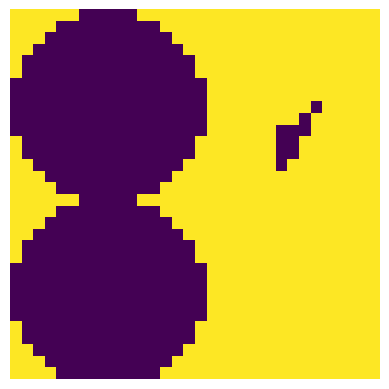

['circle', 'circle']
two circles
2 c


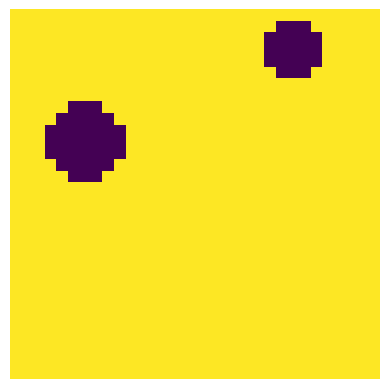

['triangle']
one triangle
1 t


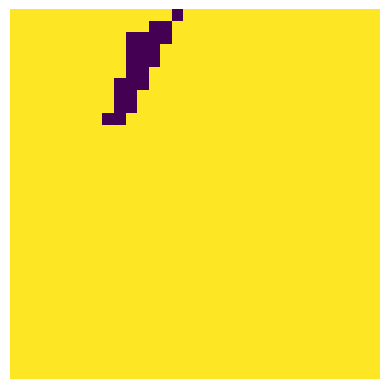

['circle', 'circle']
one circle and one circle
2 c


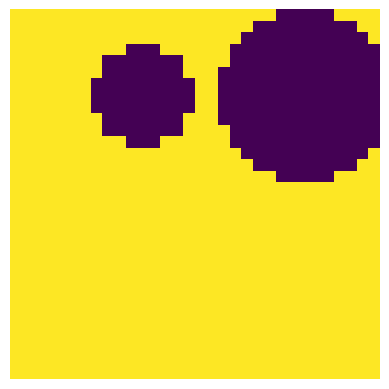

['circle', 'triangle', 'circle', 'circle']
one circle and one triangle and circle after circle
1 c 1 t 2 c


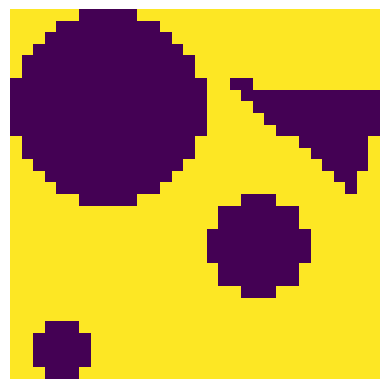

['circle', 'circle', 'triangle']
circle after circle then one triangle
2 c 1 t


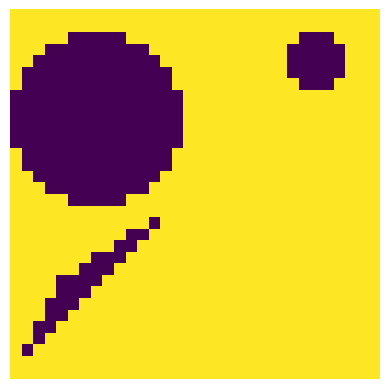

['circle', 'circle']
two circles
2 c


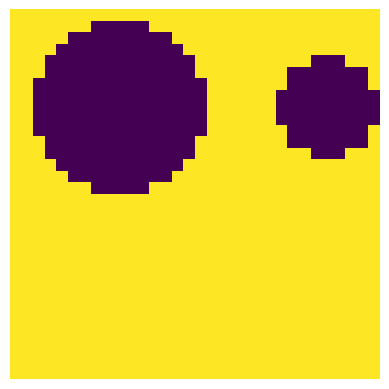

['circle', 'circle']
two circles
2 c


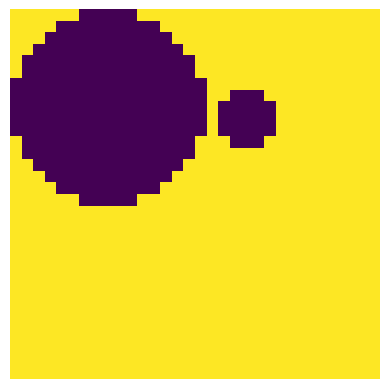

['circle', 'circle']
one circle and one circle
2 c


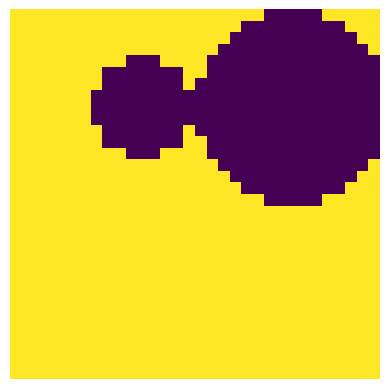

['circle', 'circle', 'circle', 'triangle']
two circles
3 c 1 t


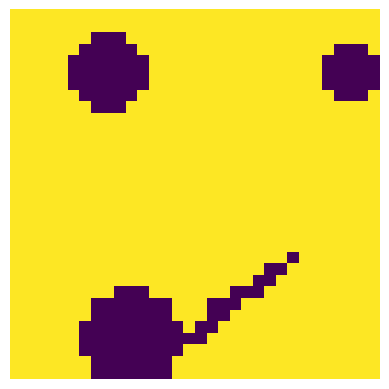

['circle', 'circle', 'triangle', 'circle']
circle after circle and a triangle and a circle
2 c 1 t 1 c


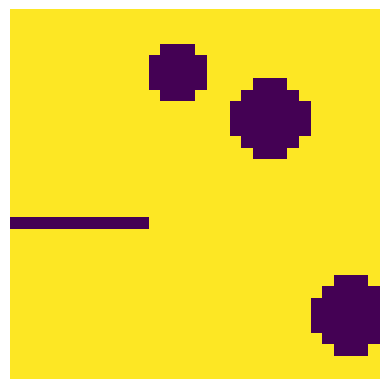

['circle']
a circle
1 c


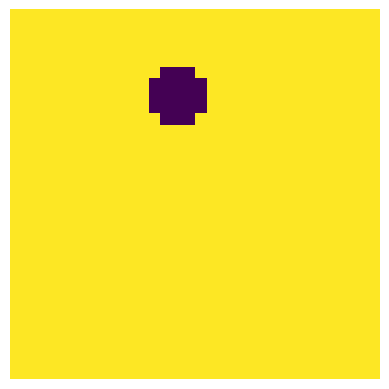

['circle']
a circle
1 c


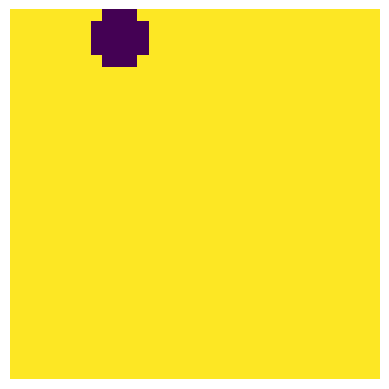

['circle', 'circle', 'triangle', 'triangle']
two circles
2 c 2 t


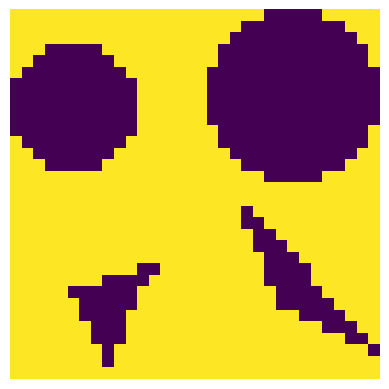

['circle', 'triangle', 'triangle']
triangle after circle and a triangle
1 c 2 t


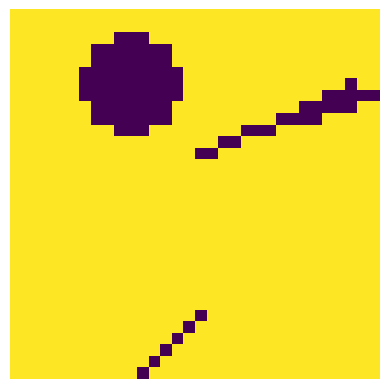

['triangle', 'triangle']
one triangle and a triangle
2 t


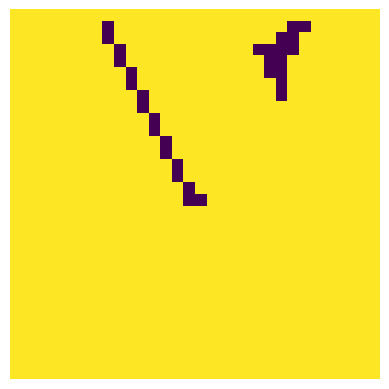

['triangle', 'triangle']
triangle after triangle
2 t


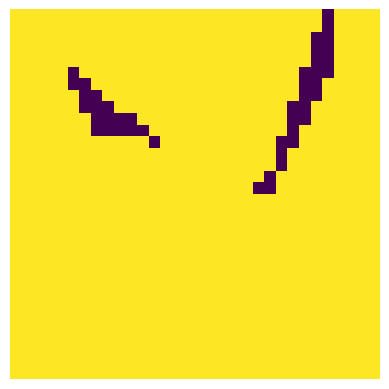

['circle']
one circle
1 c


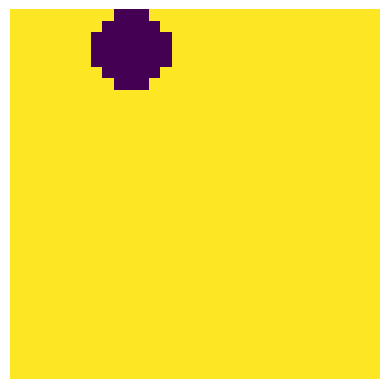

['circle', 'triangle', 'triangle']
a circle and one triangle and a triangle
1 c 2 t


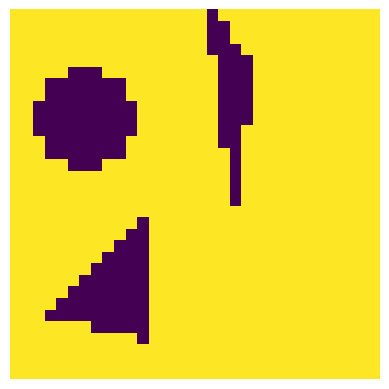

['triangle']
one triangle
1 t


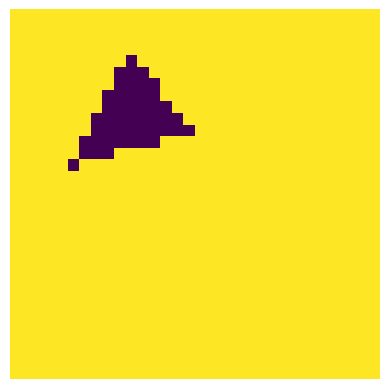

['circle', 'circle', 'triangle', 'circle']
two circles
2 c 1 t 1 c


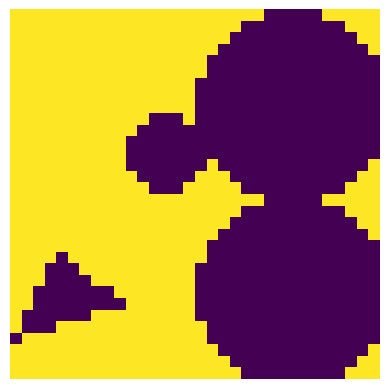

['circle', 'triangle', 'triangle']
triangle after circle and one triangle
1 c 2 t


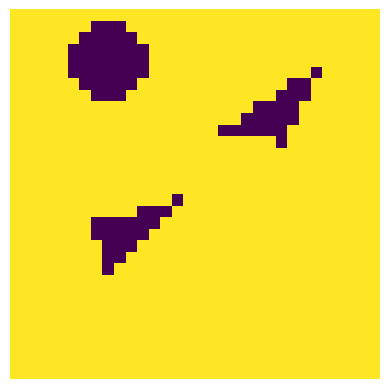

['triangle', 'triangle']
two triangles
2 t


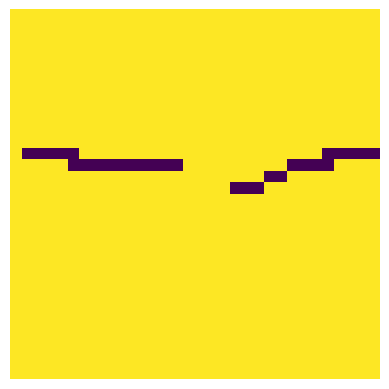

['triangle', 'triangle', 'circle', 'circle']
triangle after triangle and two circles
2 t 2 c


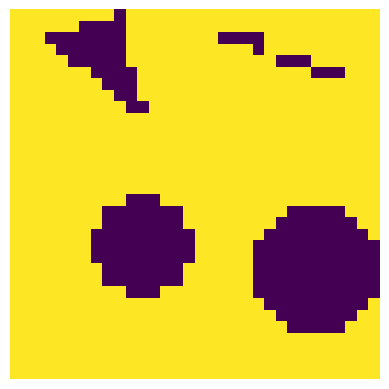

['circle', 'triangle']
triangle after circle
1 c 1 t


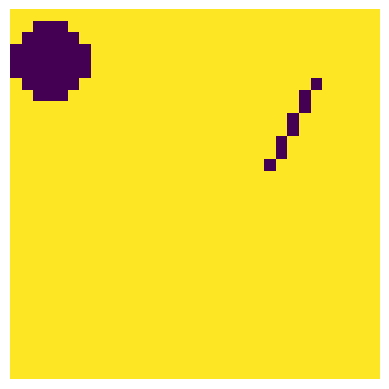

['circle']
one circle
1 c


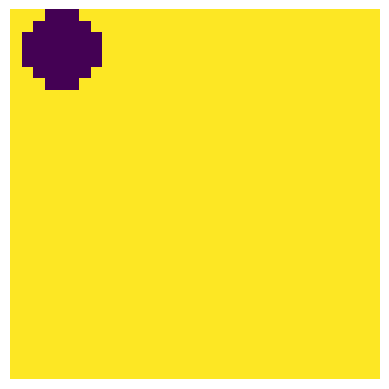

['circle']
one circle
1 c


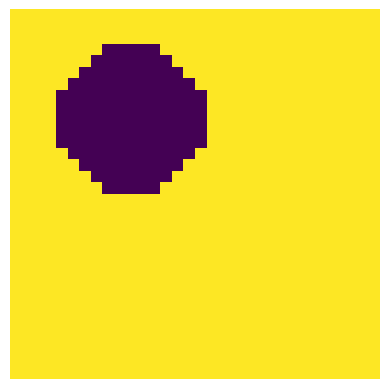

['circle', 'circle', 'triangle']
one circle and one circle and a triangle
2 c 1 t


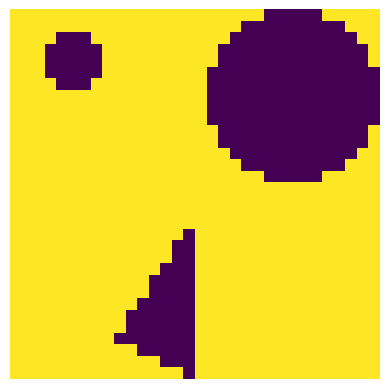

['circle', 'triangle', 'triangle', 'circle']
triangle after circle and circle after triangle
1 c 2 t 1 c


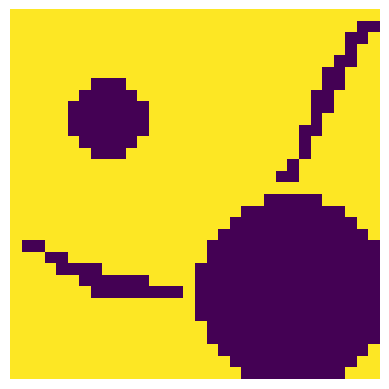

['circle', 'circle']
circle after circle
2 c


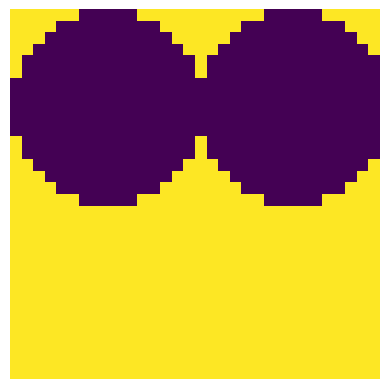

['triangle', 'circle']
circle after triangle
1 t 1 c


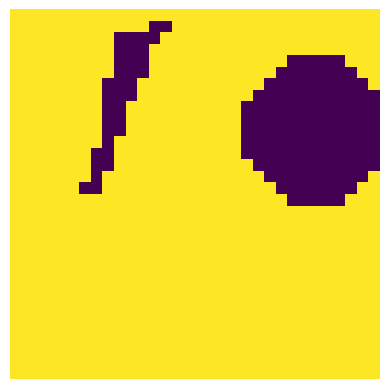

['triangle', 'triangle', 'circle']
triangle after triangle and one circle
2 t 1 c


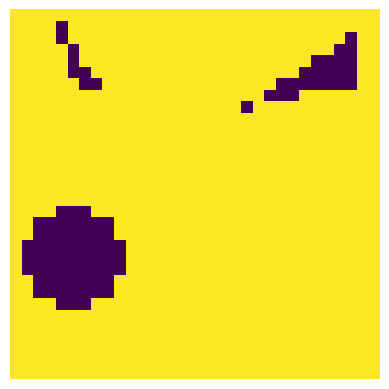

['circle', 'triangle', 'circle', 'triangle']
one circle then circle after triangle and one triangle
1 c 1 t 1 c 1 t


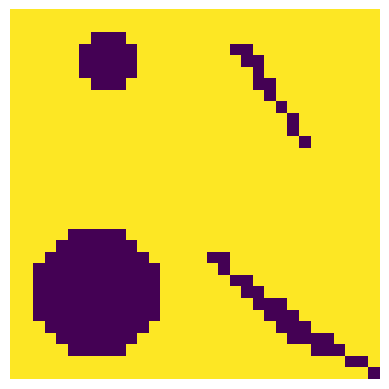

['triangle', 'circle']
one triangle and one circle
1 t 1 c


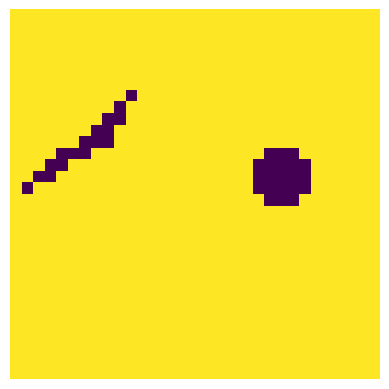

In [83]:
# Generate 100 random shape lists
shape_lists = [generate_random_shapes() for _ in range(100)]
code_lists = list(map(generate_code_str, shape_lists))
descriptions = []

# Generate descriptions and images for each shape list
for i, shape_list in enumerate(shape_lists):
  description = generate_descr_from_list(shape_list)
  descriptions.append(description)
  print(shape_list)
  print(description)
  print(code_lists[i])
  generate_image(shape_list, f"f{i}.png")
  plot_image(f"f{i}.png")


In [84]:
from torch.utils.data import Dataset


# Step 1: Prepare the Dataset
class CountingFiguresDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

In [85]:
!pip install einops

In [108]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import math
import torch.nn.functional as F
from einops import rearrange
from collections import OrderedDict
from easydict import EasyDict as edict

class MyTokenizer:
    def __init__(self, vocabulary):
        self.vocabulary = vocabulary

    def encode(self, text, add_special_tokens=True, max_length=MAX_LEN_SENTENCE, return_token_type_ids=False, padding='max_length', return_attention_mask=True, return_tensors='pt'):
        tokens = text.split()
        tokens.append(EOS_TOKEN)
        input_ids = [self.vocabulary.index(token) for token in tokens]
        attention_mask = [1] * len(input_ids)
        if add_special_tokens:
            input_ids = [self.vocabulary.index(CLASS_TOKEN)] + input_ids
            attention_mask += [1]

        sen_len = len(input_ids)
        if len(input_ids) > max_length:
            input_ids = input_ids[:max_length]
            attention_mask = attention_mask[:max_length]
        else:
            pad_length = max_length - len(input_ids)
            if pad_length >= 0:
                input_ids += [self.vocabulary.index(PAD_TOKEN)] * pad_length
                attention_mask += [0] * pad_length
        return sen_len, input_ids, attention_mask

    def encode_plus(self, text, add_special_tokens=True, max_length=MAX_LEN_SENTENCE, return_token_type_ids=False, padding='max_length', return_attention_mask=True, return_tensors='pt'):
        _, input_ids, attention_mask = self._encode(text, add_special_tokens, max_length, return_token_type_ids, padding, return_attention_mask, return_tensors)
        if return_attention_mask:
          print(input_ids)
          return {
              'input_ids': torch.tensor(input_ids),
              'attention_mask': torch.tensor(attention_mask)
          }
        else:
          return {
              'input_ids': torch.tensor(input_ids)
          }


In [87]:
class MyAttention(nn.Module):
    def __init__(self, input_dim, hidden_key_dim, hidden_val_dim, enc_emb_dim=None, num_heads=1):
        """
          Implements an attention mechanism

          Args:
          input_dim: Dimensionality of input embedding.
          hidden_key_dim: Dimensionality of key and query vectors.
          hidden_val_dim: Dimensionality of value vectors.
          enc_emb_dim: Dimensionality of encoder embeddings. If None, self-attention is used.
          mask: Whether to apply masking. If True, the attention scores for masked positions are set to -inf.
          num_heads: Number of attention heads.
        """
        super(MyAttention, self).__init__()
        self.input_dim = input_dim
        self.hidden_key_dim = hidden_key_dim
        self.hidden_val_dim = hidden_val_dim
        self.enc_emb_dim = enc_emb_dim
        self.num_heads = num_heads

        self.to_q = nn.Linear(self.input_dim, self.hidden_key_dim * self.num_heads, bias=False)

        for i in range(self.num_heads):
          if enc_emb_dim is None:
              self.to_k = nn.Linear(self.input_dim, self.hidden_key_dim * self.num_heads, bias=False)
              self.to_v = nn.Linear(self.input_dim, self.hidden_val_dim * self.num_heads, bias=False)
          else:
              self.to_k = nn.Linear(self.enc_emb_dim, self.hidden_key_dim * self.num_heads, bias=False)
              self.to_v = nn.Linear(self.enc_emb_dim, self.hidden_val_dim * self.num_heads, bias=False)

        self.to_out = nn.Linear(self.hidden_val_dim * self.num_heads, self.input_dim)

    def forward(self, embeddings, encoder_embeddings=None, attention_mask=None):

        if encoder_embeddings is None:
            Q = self.to_q(embeddings)
            K = self.to_k(embeddings)
            V = self.to_v(embeddings)
        else:
            Q = self.to_q(embeddings)
            K = self.to_k(encoder_embeddings)
            V = self.to_v(encoder_embeddings)

        Q = rearrange(Q, 'B T (H D) -> B H T D', H=self.num_heads, D=self.hidden_key_dim)
        K = rearrange(K, 'B T (H D) -> B H T D', H=self.num_heads, D=self.hidden_key_dim)
        V = rearrange(V, 'B T (H D) -> B H T D', H=self.num_heads, D=self.hidden_val_dim)

        scores = torch.einsum("BHTD,BHSD->BHTS", Q, K)

        if attention_mask is not None:
            # Originally, attention_mask has shape (batch_size, sequence_len)
            # To ensure propagation to the scores matrix, which has shape (batch_size, num_heads, sequence_len, sequence_len),
            # We need to make attention_mask's shape (batch_size, 1, 1, sequence_len)
            # We do this with the unsqueeze method, which adds a new dimension.
            attention_mask = attention_mask.unsqueeze(1).unsqueeze(1)
            scores = scores.masked_fill(attention_mask == 0, float('-inf'))

        attnmats = F.softmax(scores / math.sqrt(self.hidden_key_dim), dim=-1)

        ctx_vecs = torch.einsum("BHTS,BHSD->BHTD", attnmats, V)
        ctx_vecs = rearrange(ctx_vecs, 'B H T D -> B T (H D)', H=self.num_heads, D=self.hidden_val_dim)
        return self.to_out(ctx_vecs)

In [88]:
class MyPositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=MAX_LEN_SENTENCE):
        super(MyPositionalEncoding, self).__init__()

        # Create a matrix of shape (max_len, d_model) with all zeros
        pe = torch.zeros(max_len, d_model)

        # Create a column vector of shape (max_len, 1) with values [0, 1, ..., max_len-1]
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)

        # Create a row vector of shape (1, d_model // 2) with values [0, 1, ..., d_model//2-1]
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))

        # Apply sine to even indices and cosine to odd indices
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        # Add a batch dimension (1, max_len, d_model) and register as buffer
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        # Add positional encoding to the input tensor (B, T, D)
        x = x + self.pe[:, :x.size(1), :]
        return x

In [89]:
class MyTransformerEncoderLayer(nn.Module):
    def __init__(self, input_dim, hidden_key_dim, hidden_val_dim, output_dim, num_heads=1):
        super(MyTransformerEncoderLayer, self).__init__()
        self.input_dim = input_dim
        self.hidden_key_dim = hidden_key_dim
        self.hidden_val_dim = hidden_val_dim
        self.output_dim = output_dim
        self.num_heads = num_heads

        self.attention = MyAttention(self.input_dim, self.hidden_key_dim, self.hidden_val_dim, enc_emb_dim=None, num_heads=self.num_heads)
        self.norm1 = nn.LayerNorm(self.input_dim)
        self.feed_forward = nn.Sequential(
            nn.Linear(self.input_dim, self.output_dim),
            nn.ReLU()
        )
        self.norm2 = nn.LayerNorm(self.output_dim)

    def forward(self, x, attention_mask=None):
        x = self.norm1(self.attention(x, attention_mask=attention_mask) + x)
        x = self.norm2(self.feed_forward(x) + x)
        return x

In [90]:
class MyTransformerEncoder(nn.Module):
    def __init__(self, num_tokens, input_dim, hidden_key_dim, hidden_val_dim, output_dim, max_length, num_layers=1, num_heads=1):
        super(MyTransformerEncoder, self).__init__()
        self.num_tokens = num_tokens
        self.input_dim = input_dim
        self.hidden_key_dim = hidden_key_dim
        self.hidden_val_dim = hidden_val_dim
        self.output_dim = output_dim
        self.max_length = max_length
        self.num_heads = num_heads

        self.embedding = nn.Embedding(num_tokens, self.input_dim)
        self.positional_encoding = MyPositionalEncoding(self.input_dim, max_length)
        self.layers = nn.ModuleList([MyTransformerEncoderLayer(self.input_dim, self.hidden_key_dim, self.hidden_val_dim, self.input_dim, num_heads) for _ in range(num_layers)])
        self.linear = nn.Linear(self.input_dim, self.output_dim)
        self.norm = nn.LayerNorm(self.output_dim)

    def forward(self, x, attention_mask=None):
        x = self.embedding(x)
        x = self.positional_encoding(x)
        for layer in self.layers:
            x = layer(x, attention_mask=attention_mask)
        x = self.linear(x)
        x = self.norm(x)
        return x

In [91]:
class MyTransformerClassifier(nn.Module):
    def __init__(self, transf_enc, num_classes):
        super(MyTransformerClassifier, self).__init__()
        self.num_classes = num_classes
        self.transf_enc = transf_enc

        self.linear = nn.Linear(self.transf_enc.output_dim, self.num_classes)

    def forward(self, input_ids, labels=None, attention_mask=None):
        x = self.transf_enc(input_ids, attention_mask)[:, 0, :] # Just the embedding of the first token, which is the CLS token.
        logits = self.linear(x)

        loss = None
        if labels is not None:
            criterion = nn.CrossEntropyLoss()
            loss = criterion(logits, labels)
        return (loss, logits) if loss is not None else logits

In [103]:
import torch
from transformers import Trainer, TrainingArguments
import pandas as pd

# Step 2: Tokenizer
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokenizer = MyTokenizer(VOCABULARY)
tokenizer.encode_plus(
            "one circle after one circle and two triangles",
            add_special_tokens=True,
            max_length=MAX_LEN_SENTENCE,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
        )

[10, 5, 1, 8, 5, 1, 6, 9, 2, 14, 13, 13, 13, 13, 13, 13]


{'input_ids': tensor([10,  5,  1,  8,  5,  1,  6,  9,  2, 14, 13, 13, 13, 13, 13, 13]),
 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])}

In [ ]:
# Create Dataset
lengths = list(map(len, shape_lists))
dataset = CountingFiguresDataset(descriptions, lengths, tokenizer, max_length=MAX_LEN_SENTENCE)

In [59]:
num_tokens = len(VOCABULARY)
input_dim = 16
hidden_key_dim = 8
hidden_val_dim = 8
num_heads = 2
output_dim = 16
num_layers = 3
num_labels = 5

# Step 3: Model
# model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=10)
transf_enc = MyTransformerEncoder(num_tokens, input_dim=input_dim, hidden_key_dim=hidden_key_dim, hidden_val_dim=hidden_val_dim, output_dim=output_dim, max_length=MAX_LEN_SENTENCE, num_layers=num_layers, num_heads=num_heads)
model = MyTransformerClassifier(transf_enc, num_labels)
# model = DummyClassifier(num_labels)

# Step 4: Training
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=200,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    warmup_steps=10,
    weight_decay=0.001,
    logging_dir='./logs',
    logging_steps=10,
    eval_strategy="epoch"
)

# Split dataset into train and eval
train_size = int(0.8 * len(dataset))
eval_size = len(dataset) - train_size
train_dataset, eval_dataset = torch.utils.data.random_split(dataset, [train_size, eval_size])

# Custom Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset
)

trainer.train()



Epoch,Training Loss,Validation Loss
1,1.892300,2.155937
2,2.055100,2.047306
3,1.786800,1.947682
4,1.713300,1.866164
5,1.835100,1.794432
6,1.625800,1.735744
7,1.662200,1.680176
8,1.637300,1.635378
9,1.538400,1.588873
10,1.500700,1.557115


TrainOutput(global_step=8000, training_loss=0.7483160644471646, metrics={'train_runtime': 142.6107, 'train_samples_per_second': 112.194, 'train_steps_per_second': 56.097, 'total_flos': 0.0, 'train_loss': 0.7483160644471646, 'epoch': 200.0})

In [60]:
from torch.utils.data import DataLoader

# Step 5: Evaluation
def evaluate_model(texts, labels):
    eval_dataset = CountingFiguresDataset(texts, labels, tokenizer, max_length=MAX_LEN_SENTENCE)
    eval_loader = DataLoader(eval_dataset, batch_size=2)
    total_correct = 0
    total_samples = len(labels)
    model.eval()
    with torch.no_grad():
        for batch in eval_loader:
            input_ids = batch['input_ids']
            attention_mask = batch['attention_mask']
            labels = batch['labels']
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs, dim=-1)
            total_correct += (preds == labels).sum().item()

    accuracy = total_correct / total_samples
    print(f'Accuracy: {accuracy * 100:.2f}%')


# Generate descriptions and images for each shape list

test_shape_lists = [generate_random_shapes() for _ in range(100)]

eval_descriptions = []
eval_lengths = []
for i, shape_list in enumerate(test_shape_lists):
  eval_descriptions.append(generate_descr_from_list(shape_list))
  eval_lengths.append(len(shape_list))

evaluate_model(eval_descriptions, eval_lengths)

Accuracy: 69.00%


In [93]:
class MyTransformerDecoderLayer(nn.Module):
    def __init__(self, input_dim, hidden_key_dim, hidden_val_dim, output_dim, enc_emb_dim, num_heads):
        super(MyTransformerEncoderLayer, self).__init__()
        self.input_dim = input_dim
        self.hidden_key_dim = hidden_key_dim
        self.hidden_val_dim = hidden_val_dim
        self.output_dim = output_dim
        self.enc_emb_dim = enc_emb_dim
        self.num_heads = num_heads

        self.masked_att = MyAttention(self.input_dim, self.hidden_key_dim, self.hidden_val_dim, enc_emb_dim=None, mask=True, num_heads=self.num_heads)
        self.norm1 = nn.LayerNorm(self.input_dim)
        self.cross_att = MyAttention(self.input_dim, self.hidden_key_dim, self.hidden_val_dim, enc_emb_dim=self.enc_emb_dim, mask=False, num_heads=self.num_heads)
        self.norm2 = nn.LayerNorm(self.input_dim)
        self.self_att = MyAttention(self.input_dim, self.hidden_key_dim, self.hidden_val_dim, enc_emb_dim=None, mask=False, num_heads=self.num_heads)
        self.norm3 = nn.LayerNorm(self.input_dim)
        self.feed_forward = nn.Sequential(
            nn.Linear(self.hidden_dim, self.output_dim),
            nn.ReLU()
        )

    def forward(self, x, enc_emb, attention_mask):
        x = self.norm1(x + self.masked_att(x, attention_mask))
        x = self.norm2(x + self.cross_att(x, encoder_embeddings=enc_emb, attention_mask=attention_mask))
        x = self.norm3(x + self.self_att(x))
        x = self.feed_forward(x)
        return x

In [94]:
class MyTransformerDecoder(nn.Module):
    def __init__(self, num_tokens, input_dim, hidden_key_dim, hidden_val_dim, output_dim, enc_emb_dim, max_length, num_layers, num_heads):
        super(MyTransformerEncoder, self).__init__()
        self.num_tokens = num_tokens
        self.input_dim = input_dim
        self.hidden_key_dim = hidden_key_dim
        self.hidden_val_dim = hidden_val_dim
        self.output_dim = output_dim
        self.enc_emb_dim = enc_emb_dim
        self.max_length = max_length
        self.num_heads = num_heads

        self.embedding = nn.Embedding(num_tokens, self.input_dim)
        self.positional_encoding = MyPositionalEncoding(self.input_dim, max_length)
        self.layers = nn.ModuleList([MyTransformerDecoderLayer(input_dim=self.input_dim,
                                                               hidden_dim=self.hidden_dim,
                                                               enc_emb_dim=self.enc_emb_dim,
                                                               num_heads=num_heads) for _ in range(num_layers)])
        self.linear = nn.Linear(self.input_dim, self.output_dim)
        self.norm = nn.LayerNorm(self.output_dim)

    def forward(self, x, enc_emb, attention_mask):
        x = self.embedding(x)
        x = self.positional_encoding(x)
        for layer in self.layers:
            x = layer(x, enc_emb, attention_mask=attention_mask)
        x = self.linear(x)
        x = self.norm(x)
        return x

In [95]:
class MyTransformerTranslator(nn.Module):
    def __init__(self, transf_enc, transf_dec, num_tokens_target_vocab):
        super(MyTransformerTranslator, self).__init__()
        self.transf_enc = transf_enc
        self.transf_dec = transf_dec
        self.linear = nn.Linear(self.transf_dec.output_dim, num_tokens_target_vocab)

    def forward(self, source_embeddings, target_embeddings, attention_mask):
        source_embeddings = self.transf_enc(source_embeddings)
        decoded_embeddings = self.transf_dec(target_embeddings, source_embeddings, attention_mask)
        return self.linear(decoded_embeddings)

In [114]:

class MyRandomMaskTokenizer(MyTokenizer):
  def __init__(self, vocabulary):
    super().__init__(vocabulary)

  def encode_plus(self, text, add_special_tokens=True, max_length=MAX_LEN_SENTENCE, return_token_type_ids=False, padding='max_length', return_attention_mask=True, return_tensors='pt'):
    sen_len, input_ids, attention_mask = super().encode(text, add_special_tokens, max_length, return_token_type_ids, padding, return_attention_mask, return_tensors)
    if return_attention_mask:
      new_len = random.randint(1, sen_len)
      new_attention_mask = torch.cat((torch.ones(new_len), torch.zeros(sen_len - new_len)))
      return {
              'input_ids': torch.tensor(input_ids),
              'attention_mask': torch.tensor(attention_mask)
      }
    else:
      return {
              'input_ids': torch.tensor(input_ids)
      }

tokenizer = MyRandomMaskTokenizer(CODE_VOCABULARY)
tk = tokenizer.encode_plus(
            "c 2 t 1",
            add_special_tokens=True,
            max_length=MAX_LEN_SENTENCE,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
        )



6
['CLS', 'c', '2', 't', '1', 'EOS', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD']
{'input_ids': tensor([ 0, 11,  7, 10,  6,  4,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3]), 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}


In [113]:
class TranslationDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }